## Elasticnet with PCA and Polynomial Features 

# 1. Generate interaction and polynomial features
# 2. Standardize the features
# 3. Apply PCA
# 4. Split data into training and testing sets
# 5. Fit ElasticNet model
# 6. Predictions and evaluation
# 7. Feature importances (mapping PCA components back to original features)
# 8. Fit an OLS model to show p-values for features
# 9. Create a dictionary mapping original feature names to X_poly columns
# 10. Print feature mapping

Trial 1: 20 features with degree=2

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset (using California housing dataset as a replacement for Boston)
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [5]:
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [6]:
X.shape

(20640, 8)

In [7]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [11]:
print(y.mean())
print(y.std())


2.068558169089147
1.1539282040412253


In [12]:
# Generate interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

Standardization (using StandardScaler):
Transforms features to have zero mean and unit variance: (x - mean)/std
Puts all features on the same scale
Important when features have different units or scales (e.g., income in dollars vs. number of rooms)
Should be done before any regularization
Regularization (in ElasticNet):
Penalizes large coefficients to prevent overfitting
Combines L1 (Lasso) and L2 (Ridge) penalties
Works better when features are on the same scale
Does not handle the initial scaling of features
Here's why we need both:
Without standardization, features with larger scales would dominate the model
Regularization assumes all features are comparable in scale
For PCA (used later), standardization is crucial as it's sensitive to the scale of input features

In [13]:
# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

PCA.fit_transform:
Performs dimensionality reduction through feature transformation
Creates new features that are linear combinations of original features
Aims to maximize variance explained while reducing dimensions
Is an unsupervised method (doesn't use target variable y)

In [24]:
# Apply PCA
pca = PCA(n_components=20)  # Retain first 20 components for demonstration
X_pca = pca.fit_transform(X_poly_scaled)

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=41)

Performs regression with regularization
Finds coefficients to predict target variable
Combines L1 and L2 regularization to prevent overfitting
Is a supervised method (uses target variable y)

In [27]:
# Fit ElasticNet model
elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=42)

In [28]:
# Predictions and evaluation
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [29]:
# Feature importances (mapping PCA components back to original features)
pca_loadings = pca.components_
original_coefficients = np.dot(pca_loadings.T, elastic_net.coef_)



In [30]:
# Summary
summary = {
    'RMSE': rmse,
    'R2 Score': r2,
    'ElasticNet Coefficients': elastic_net.coef_,
    'Original Feature Contributions': original_coefficients
}

# Print the model summary
print("Model Summary:")
for key, value in summary.items():
    print(f"{key}: {value}\n")

Model Summary:
RMSE: 0.7267375109613452

R2 Score: 0.5984461299638537

ElasticNet Coefficients: [ 0.09109678  0.00800275  0.05153967  0.30307972  0.0158813   0.07892587
  0.12807246 -0.00527525 -0.06149932  0.19755661 -0.20232612 -0.60293969
  0.3564905   0.08635304  0.         -0.06316725 -0.          0.
 -0.05554126 -0.        ]

Original Feature Contributions: [ 2.17115316e-01  2.43563880e-02 -3.97538081e-02  6.56929568e-02
 -1.42099828e-02 -2.20825571e-02 -2.91039511e-01 -3.47283883e-01
 -1.15305672e-01  1.57926353e-01 -4.36893951e-02  1.59764216e-01
  1.36226822e-01 -7.50390467e-04  2.08775000e-01 -2.31997393e-01
  8.75383824e-03 -5.50928926e-02 -1.98212592e-04  2.33636571e-02
  3.47902482e-03 -3.43671469e-03 -3.84113662e-02  3.67209316e-02
 -1.62135128e-02 -8.06083706e-02  1.78798369e-02 -6.53051798e-02
  2.66185268e-02 -6.88606507e-02 -3.01890971e-02 -8.76507918e-03
  2.53189535e-02 -7.89132656e-02  3.31630555e-02  2.18774154e-02
 -3.09996223e-02  5.88489382e-03 -9.57523588e-04 

In [32]:
# Fit an OLS model to show p-values for features
import statsmodels.api as sm
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1378.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:09:47   Log-Likelihood:                -17706.
No. Observations:               16512   AIC:                         3.545e+04
Df Residuals:                   16491   BIC:                         3.562e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0737      0.006    376.585      0.0

In [33]:
# Create a dictionary mapping original feature names to X_poly columns
feature_names = poly.get_feature_names_out(california.feature_names)
feature_mapping = {f"X{i+1}": name for i, name in enumerate(feature_names)}

# Print feature mapping
dictionary_output = {f"X{i+1}": feature for i, feature in enumerate(feature_names)}
print("Feature Mapping:")
print(dictionary_output)

Feature Mapping:
{'X1': 'MedInc', 'X2': 'HouseAge', 'X3': 'AveRooms', 'X4': 'AveBedrms', 'X5': 'Population', 'X6': 'AveOccup', 'X7': 'Latitude', 'X8': 'Longitude', 'X9': 'MedInc^2', 'X10': 'MedInc HouseAge', 'X11': 'MedInc AveRooms', 'X12': 'MedInc AveBedrms', 'X13': 'MedInc Population', 'X14': 'MedInc AveOccup', 'X15': 'MedInc Latitude', 'X16': 'MedInc Longitude', 'X17': 'HouseAge^2', 'X18': 'HouseAge AveRooms', 'X19': 'HouseAge AveBedrms', 'X20': 'HouseAge Population', 'X21': 'HouseAge AveOccup', 'X22': 'HouseAge Latitude', 'X23': 'HouseAge Longitude', 'X24': 'AveRooms^2', 'X25': 'AveRooms AveBedrms', 'X26': 'AveRooms Population', 'X27': 'AveRooms AveOccup', 'X28': 'AveRooms Latitude', 'X29': 'AveRooms Longitude', 'X30': 'AveBedrms^2', 'X31': 'AveBedrms Population', 'X32': 'AveBedrms AveOccup', 'X33': 'AveBedrms Latitude', 'X34': 'AveBedrms Longitude', 'X35': 'Population^2', 'X36': 'Population AveOccup', 'X37': 'Population Latitude', 'X38': 'Population Longitude', 'X39': 'AveOccup^2'

#!!Misleading, the feature mapping is not correct.

After PCA transformation, your features would actually be more like:
# What the features ACTUALLY are after PCA
pca_feature_mapping = {
    'PC1': 'First principal component (linear combination of original features)',
    'PC2': 'Second principal component',
    # ... and so on
}

In [38]:
# To see how original features contribute to each PCA component
for i, component in enumerate(pca.components_):
    print(f"\nPrincipal Component {i+1} composition:")
    # Get feature contributions sorted by importance
    feature_weights = sorted(zip(feature_names, component), key=lambda x: abs(x[1]), reverse=True)
    for feature, weight in feature_weights[:5]:  # Show top 5 contributors
        print(f"{feature}: {weight:.3f}")


Principal Component 1 composition:
AveRooms Latitude: 0.294
AveRooms Longitude: -0.293
AveRooms: 0.292
AveBedrms Latitude: 0.269
AveBedrms Longitude: -0.267

Principal Component 2 composition:
Population AveOccup: 0.306
AveOccup: 0.303
AveOccup Longitude: -0.303
AveOccup Latitude: 0.302
HouseAge AveOccup: 0.295

Principal Component 3 composition:
AveRooms Population: 0.267
MedInc Population: 0.253
HouseAge Latitude: -0.250
AveBedrms Population: 0.247
HouseAge Longitude: 0.246

Principal Component 4 composition:
MedInc: 0.365
MedInc Longitude: -0.364
MedInc Latitude: 0.359
MedInc^2: 0.355
MedInc HouseAge: 0.315

Principal Component 5 composition:
Latitude Longitude: 0.437
Latitude: -0.431
Latitude^2: -0.431
Longitude^2: -0.429
Longitude: 0.429

Principal Component 6 composition:
HouseAge Population: 0.367
HouseAge: 0.316
HouseAge Longitude: -0.315
HouseAge^2: 0.314
HouseAge Latitude: 0.310

Principal Component 7 composition:
AveBedrms^2: 0.478
AveRooms AveBedrms: 0.447
AveRooms^2: 0.40

Is 20 features with degree=2 better than 5 features with degree=10?

In [34]:
# Generate interaction and polynomial features
poly = PolynomialFeatures(degree=10, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Apply PCA
pca = PCA(n_components=5)  # Retain first 5 components for demonstration 2
X_pca = pca.fit_transform(X_poly_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit ElasticNet model
elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Predictions and evaluation
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Feature importances (mapping PCA components back to original features)
pca_loadings = pca.components_
original_coefficients = np.dot(pca_loadings.T, elastic_net.coef_)

# Fit an OLS model to show p-values for features
import statsmodels.api as sm
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     917.0
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:13:13   Log-Likelihood:                -23802.
No. Observations:               16512   AIC:                         4.762e+04
Df Residuals:                   16506   BIC:                         4.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0711      0.008    260.120      0.0

In [36]:
# Summary
summary = {
    'RMSE': rmse,
    'R2 Score': r2,
    'ElasticNet Coefficients': elastic_net.coef_,
    'Original Feature Contributions': original_coefficients
}

# Print the model summary
print("Model Summary:")
for key, value in summary.items():
    print(f"{key}: {value}\n")

Model Summary:
RMSE: 1.022322323036426

R2 Score: 0.20242996687827908

ElasticNet Coefficients: [-0.00016208  0.00075345  0.00139453  0.0035988  -0.00878313]

Original Feature Contributions: [ 1.23652363e-04  4.59185073e-05  3.61544672e-05 ...  1.58587654e-05
 -1.87448904e-05  2.25241008e-05]



Answer: 5 features with degree=10 is not better than 20 features with degree=2 because the 5 features with degree=10 have a higher RMSE and lower R2 score.

In [ ]:
Question 2: how to determine the number of features to use?
Answer: The number of features to use is determined by the number of features that have a p-value less than 0.05.
Answer2: The number of features is determined by a param grid search and cross validation.

In [37]:
# Generate interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Apply PCA
pca = PCA(n_components=10)  # Retain first 5 components for demonstration 2
X_pca = pca.fit_transform(X_poly_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit ElasticNet model
elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Predictions and evaluation
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Feature importances (mapping PCA components back to original features)
pca_loadings = pca.components_
original_coefficients = np.dot(pca_loadings.T, elastic_net.coef_)

# Fit an OLS model to show p-values for features
import statsmodels.api as sm
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1875.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:17:12   Log-Likelihood:                -19558.
No. Observations:               16512   AIC:                         3.914e+04
Df Residuals:                   16501   BIC:                         3.922e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0696      0.006    336.079      0.0

Bonus code

Cross-Validation with Grid Search:

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('elasticnet', ElasticNetCV(cv=5))
])

# Define parameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],
    'pca__n_components': [5, 10, 15, 20]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)  # Convert back from negative MSE

Best parameters: {'pca__n_components': 15, 'poly__degree': 2}
Best score: 0.591648936175831


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mason\AppData\Roaming\Python\Python312\site-pa

Note, some gridsearch tries failed because the param poly__degree effects the number of available features for PCA.

# Let's demonstrate with a simple example using 3 original features (X1, X2, X3):

# degree=1 (original features only):
# X1, X2, X3
# Total: 3 features

# degree=2 adds:
# X1², X2², X3²
# X1X2, X1X3, X2X3
# Total: 9 features

# degree=3 adds:
# X1³, X2³, X3³
# X1²X2, X1²X3, X2²X1, X2²X3, X3²X1, X3²X2
# X1X2X3
# Total: 19 features

Explained Variance Ratio for PCA Components:

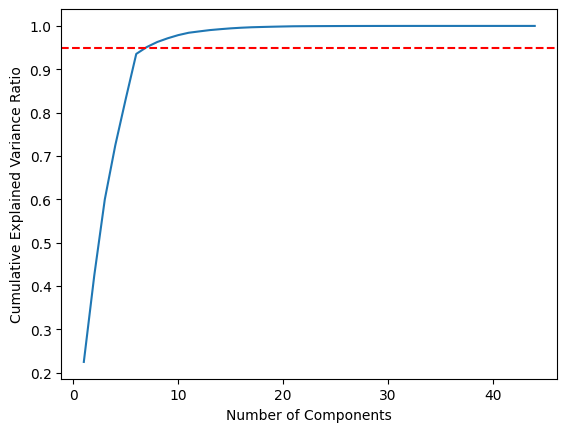

Number of components needed for 95% variance: 7


In [40]:
# Fit PCA with max components
pca = PCA()
pca.fit(X_poly_scaled)

# Plot cumulative explained variance ratio
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold
plt.show()

# Find number of components for 95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components}")

In [48]:
# Load dataset (using California housing dataset as a replacement for Boston)
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Generate interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Apply PCA
pca = PCA(n_components=7)  # Retain first 7 components for demonstration 3
X_pca = pca.fit_transform(X_poly_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit ElasticNet model
elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Predictions and evaluation
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Feature importances (mapping PCA components back to original features)
pca_loadings = pca.components_
original_coefficients = np.dot(pca_loadings.T, elastic_net.coef_)

# Fit an OLS model to show p-values for features
import statsmodels.api as sm
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     2488.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:37:26   Log-Likelihood:                -19879.
No. Observations:               16512   AIC:                         3.977e+04
Df Residuals:                   16504   BIC:                         3.984e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0697      0.006    329.668      0.0

Test the model with the test set


Test Set Performance Metrics:
Mean Squared Error: 0.6940
Root Mean Squared Error: 0.8331
R-squared Score: 0.4704
Mean Absolute Error: 0.6097


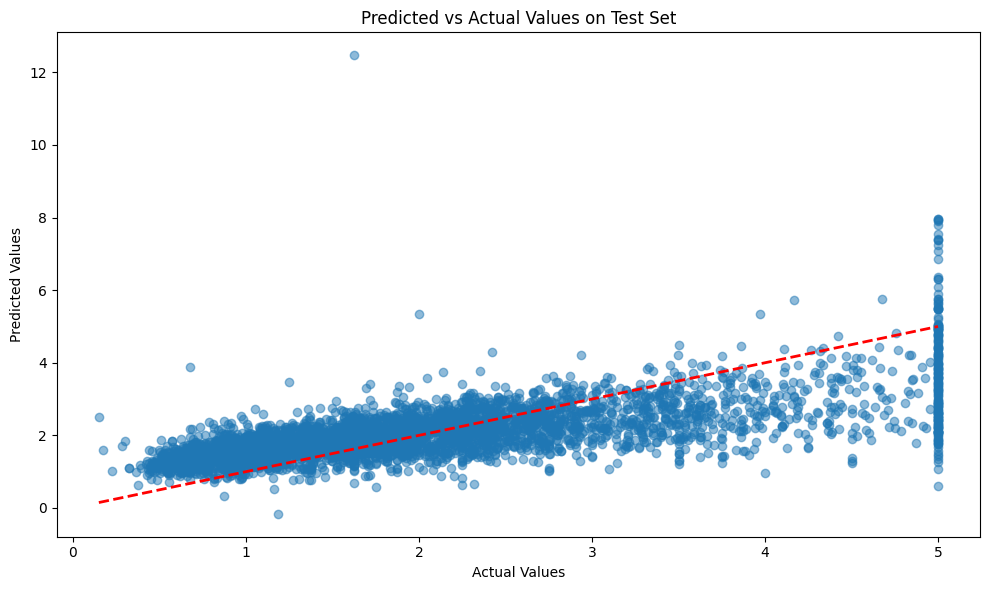

In [50]:
from sklearn.metrics import mean_absolute_error

# Make predictions on test set
y_pred_test = elastic_net.predict(X_test)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

# Print test set performance metrics
print("Test Set Performance Metrics:")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"Root Mean Squared Error: {rmse_test:.4f}") 
print(f"R-squared Score: {r2_test:.4f}")
print(f"Mean Absolute Error: {mae_test:.4f}")

# Create scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values on Test Set')
plt.tight_layout()
plt.show()


Collect a random sample of 100 rows from the original dataset. create a new df with the actual cost of a house, the predicted cost of a house, and the difference between the actual and predicted cost. Print the first 20 rows of the new df. Plot a histogram of the difference between the actual and predicted cost.



First 20 rows of comparison:
    Actual Price  Predicted Price  Difference
0          2.385         1.713951    0.671049
1          3.297         1.972385    1.324615
2          0.952         1.861370   -0.909370
3          2.451         2.178520    0.272480
4          0.641         1.115009   -0.474009
5          3.766         2.888382    0.877618
6          2.307         2.932999   -0.625999
7          1.752         2.106392   -0.354392
8          4.167         5.835018   -1.668018
9          0.938         1.383406   -0.445406
10         1.967         2.288004   -0.321004
11         1.750         1.474502    0.275498
12         0.546         1.141244   -0.595244
13         3.307         3.082452    0.224548
14         1.063         1.379415   -0.316415
15         4.381         3.643806    0.737194
16         0.859         1.571761   -0.712761
17         0.982         1.685151   -0.703151
18         1.941         3.346739   -1.405739
19         1.457         2.257927   -0.800927


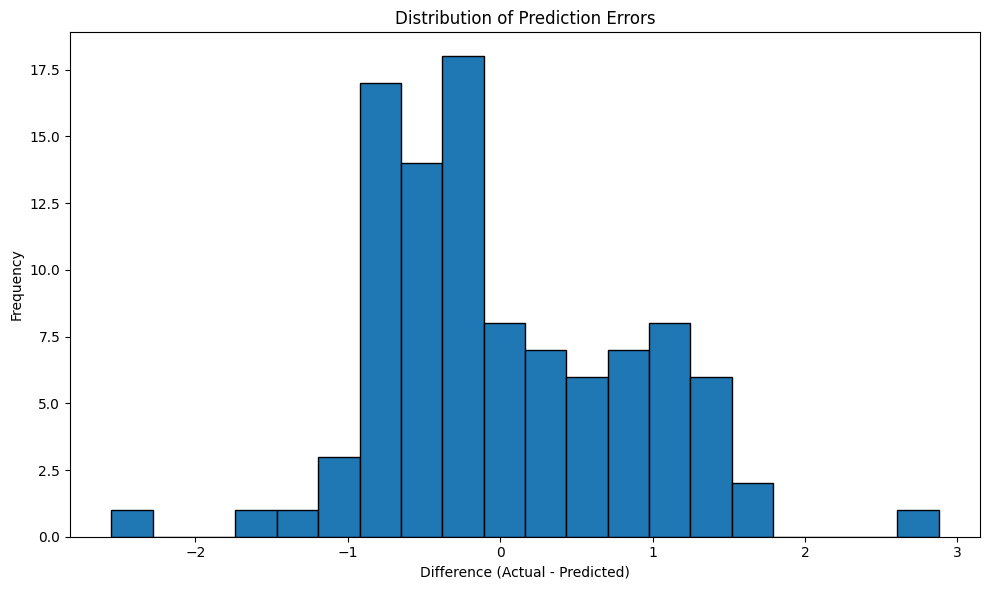

In [56]:
# Get random sample of 100 indices
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=100, replace=False)

# Create predictions for sampled data
sample_actual = y_test[sample_indices]
# Add constant term to X_test for OLS prediction
X_test_with_const = sm.add_constant(X_test[sample_indices])
sample_predicted = ols_model.predict(X_test_with_const)
sample_diff = sample_actual - sample_predicted

# Create DataFrame with actual, predicted and difference
comparison_df = pd.DataFrame({
    'Actual Price': sample_actual,
    'Predicted Price': sample_predicted,
    'Difference': sample_diff
})

# Print first 20 rows
print("\nFirst 20 rows of comparison:")
print(comparison_df.head(20))

# Create histogram of differences
plt.figure(figsize=(10, 6))
plt.hist(sample_diff, bins=20, edgecolor='black')
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

In [57]:
# Try different regularization parameters
param_grid = {
    'poly__degree': [1, 2],
    'pca__n_components': [5, 7, 10],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],
    'elasticnet__alpha': [0.001, 0.01, 0.1]
}

# Add scoring metrics
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=['neg_mean_squared_error', 'r2'],
    refit='neg_mean_squared_error'
)

In [59]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Compare different models
models = {
    'elastic_net': ElasticNetCV(),
    'random_forest': RandomForestRegressor(),
    'gradient_boost': GradientBoostingRegressor(),
    'svr': SVR()
}

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean R2 = {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

elastic_net: Mean R2 = 0.553 (+/- 0.126)
random_forest: Mean R2 = 0.651 (+/- 0.164)
gradient_boost: Mean R2 = 0.670 (+/- 0.081)
svr: Mean R2 = 0.669 (+/- 0.113)


Key characteristics of SVR:
Non-linear regression: Can capture complex patterns using different kernels
Epsilon-tube: Only errors larger than epsilon contribute to the cost function
Robust to outliers: Less sensitive to outliers compared to linear regression

Pros:
Good for non-linear relationships
Robust to outliers
Works well with high-dimensional data
Cons:
Computationally intensive for large datasets
Sensitive to feature scaling (requires StandardScaler)
Less interpretable than linear models

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

grid_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

In [61]:
# Fit the grid search
grid_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best MSE score: {:.3f}".format(-grid_search.best_score_))

# Get the best model
best_svr = grid_search.best_estimator_

# Create pipeline with scaling and best SVR model
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', best_svr)
])

# Evaluate using cross validation
scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='r2')
print(f"SVR with best params: Mean R2 = {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
